
[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   Year            Province  Total Cases  Latitude  Longitude
0  2024         Balochistan            8   30.1798    66.3980
1  2024               Sindh            2   25.4760    68.8758
2  2023  Khyber Pakhtunkhwa            4   34.1598    71.5249
3  2023               Sindh            2   25.4760    68.8758
4  2022  Khyber Pakhtunkhwa           20   34.1598    71.5249


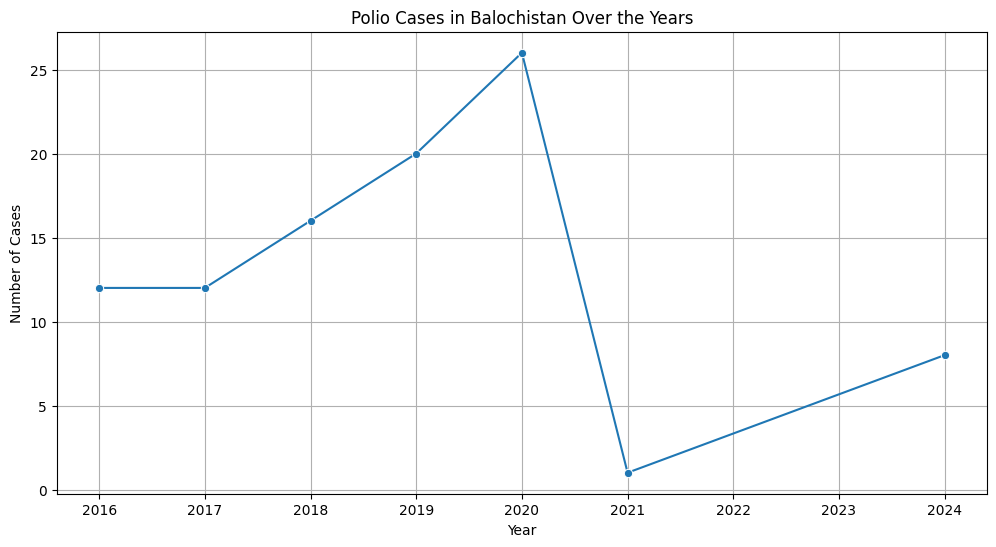

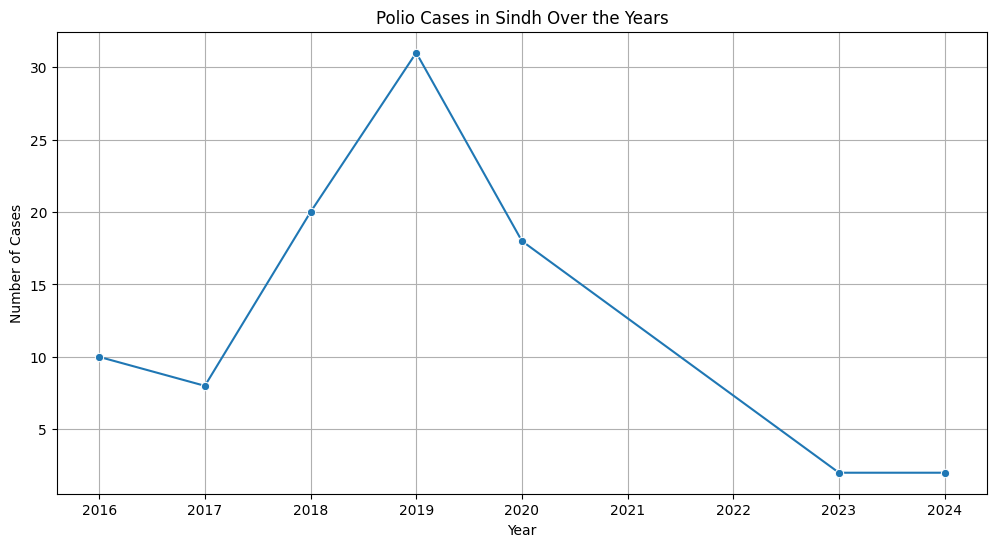

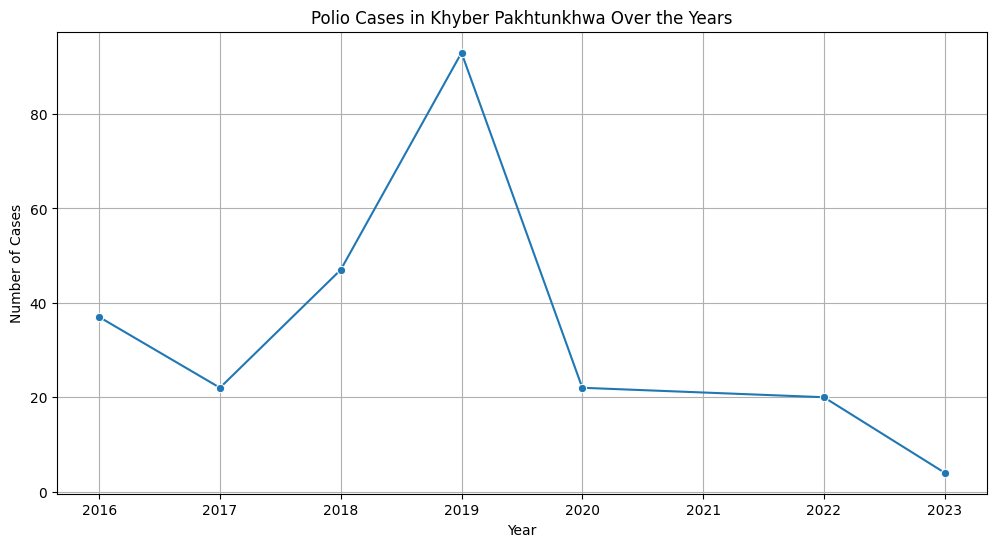

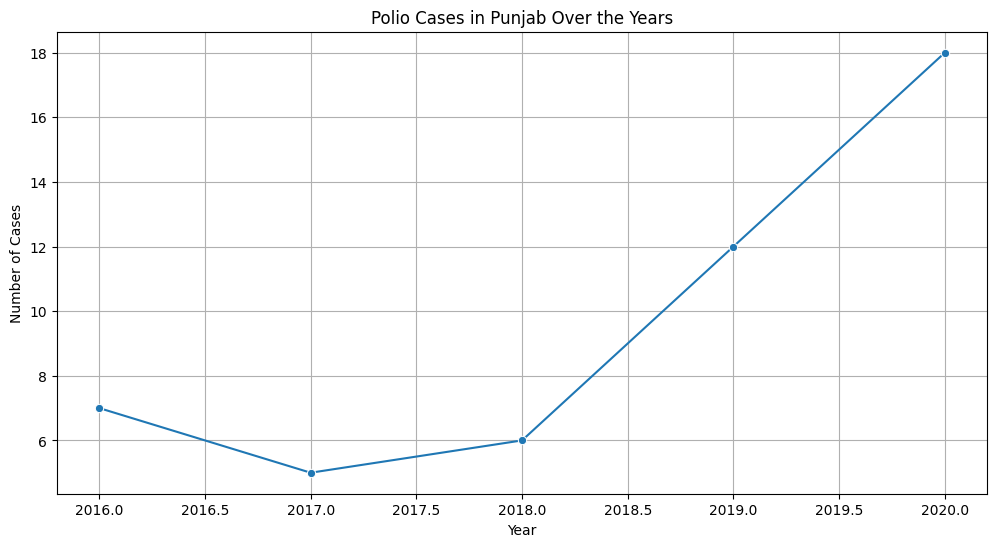

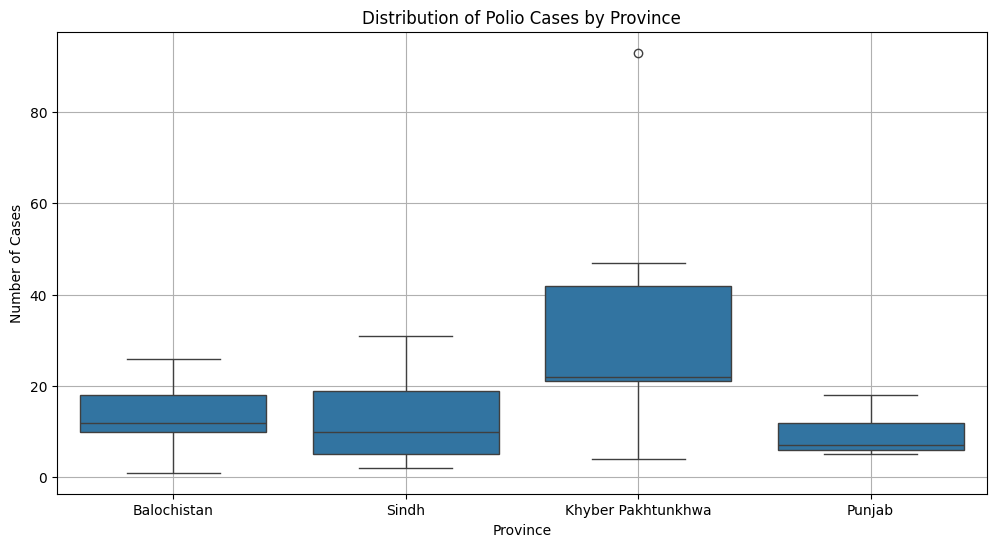

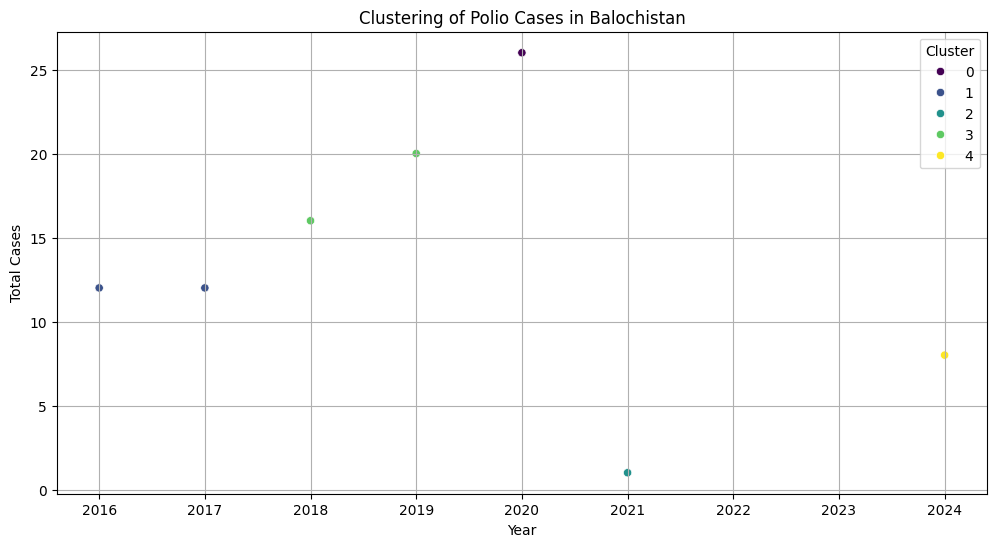

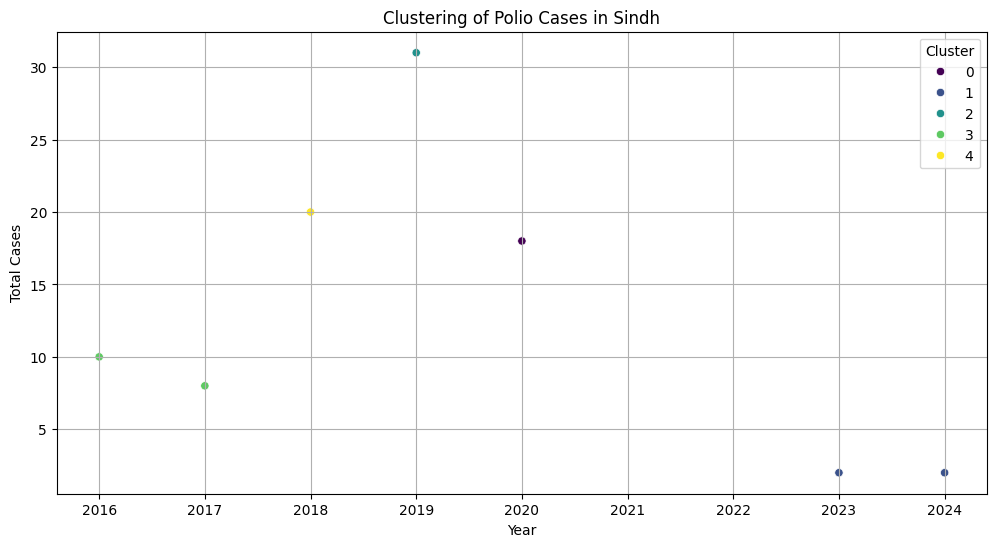

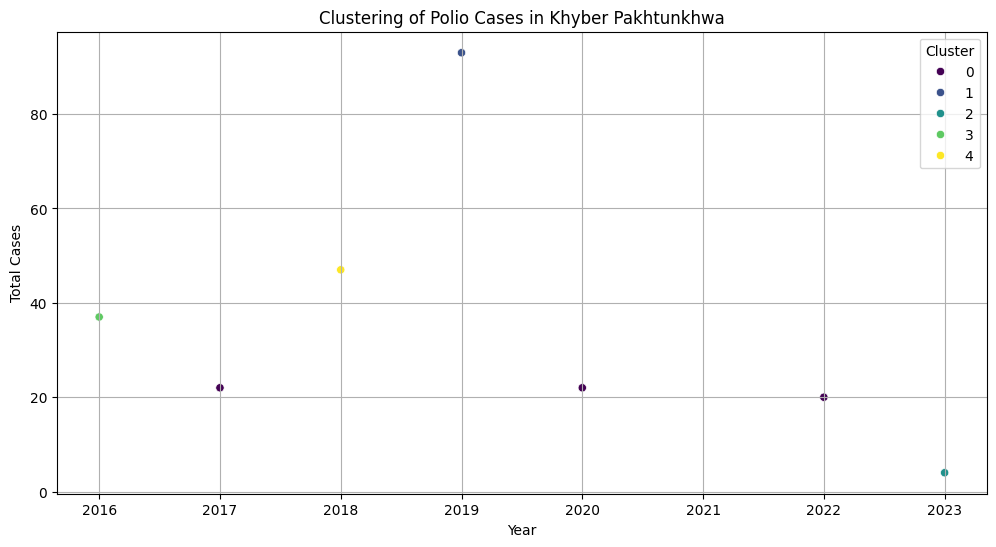

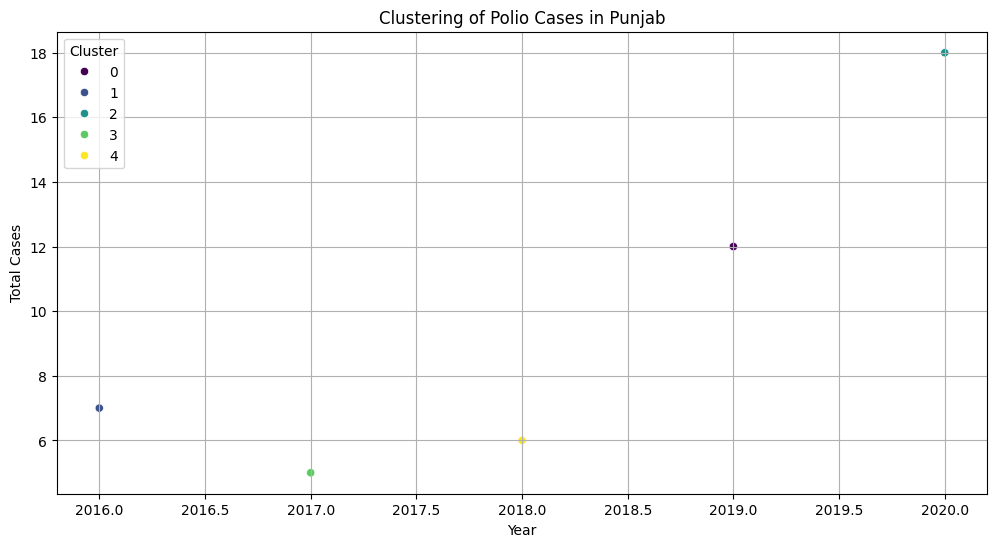

Estimated Polio Cases for 2025:
Balochistan: 15 cases
Sindh: 16 cases
Khyber Pakhtunkhwa: 45 cases
Punjab: 6 cases


In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn scikit-learn folium statsmodels

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('polio_cases_with_coordinates.csv')  # Ensure 'polio_cases_with_coordinates.csv' is in the same directory as your script or provide the full path.

# Verify data
print(data.head())

# EDA and Visualization
regions = data['Province'].unique()

# Line Plots
for region in regions:
    region_data = data[data['Province'] == region]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=region_data, x='Year', y='Total Cases', marker='o')
    plt.title(f'Polio Cases in {region} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.grid(True)
    plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Province', y='Total Cases')
plt.title('Distribution of Polio Cases by Province')
plt.xlabel('Province')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

# Clustering
for region in regions:
    region_data = data[data['Province'] == region].copy()
    features = region_data[['Total Cases']]
    kmeans = KMeans(n_clusters=5, random_state=42)
    region_data['Cluster'] = kmeans.fit_predict(features)

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=region_data, x='Year', y='Total Cases', hue='Cluster', palette='viridis', marker='o')
    plt.title(f'Clustering of Polio Cases in {region}')
    plt.xlabel('Year')
    plt.ylabel('Total Cases')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Full Map Visualization with Heatmap
m = folium.Map(location=[30.3753, 69.3451], zoom_start=5)  # Center of Pakistan
heat_data = [[row['Latitude'], row['Longitude'], row['Total Cases']] for index, row in data.iterrows() if pd.notna(row['Latitude']) and pd.notna(row['Longitude'])]
if heat_data:
    HeatMap(heat_data).add_to(m)
m.save('polio_heatmap_pakistan.html')

# Linear Regression Forecasting Function
def forecast_cases_linear(data, forecast_years=1):
    forecasts = {}
    
    for region in regions:
        region_data = data[data['Province'] == region]
        
        # Check if there's enough data
        if len(region_data) < 2:
            forecasts[region] = "Not enough data to forecast."
            continue

        # Prepare data for Linear Regression
        region_data = region_data[['Year', 'Total Cases']]
        X = region_data[['Year']].values
        y = region_data['Total Cases'].values

        # Fit Linear Regression model
        model = LinearRegression()
        model.fit(X, y)

        # Forecasting
        last_year = X[-1][0]
        future_years = np.arange(last_year + 1, last_year + forecast_years + 1).reshape(-1, 1)
        forecast_values = model.predict(future_years)

        forecasts[region] = forecast_values[-1]  # Forecast for the next year
    
    return forecasts

# Forecasting for 2025
forecast_year = 2025
forecasts = forecast_cases_linear(data, forecast_years=1)

# Print the forecast
print(f"Estimated Polio Cases for {forecast_year}:")
for region, forecast in forecasts.items():
    if isinstance(forecast, str):
        print(f"{region}: {forecast}")
    else:
        print(f"{region}: {int(forecast)} cases")
